In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


In [26]:
cities

['butaritari',
 'kapit',
 'avarua',
 'vaitupu',
 'genhe',
 'punta arenas',
 'jamestown',
 'katsuura',
 'roebourne',
 'ushuaia',
 'bluff',
 'rikitea',
 'vestmannaeyjar',
 'belushya guba',
 'satuba',
 'kahului',
 'barentsburg',
 'baoqing',
 'qaanaaq',
 'mataura',
 'port blair',
 'pauini',
 'kapaa',
 'abu kamal',
 'mayo',
 'vaini',
 'broken hill',
 'waris aliganj',
 'hobart',
 'togur',
 'north myrtle beach',
 'port moresby',
 'albany',
 'petropavlovsk-kamchatskiy',
 'shaowu',
 'rovaniemi',
 'cherskiy',
 'talnakh',
 'bambous virieux',
 'busselton',
 'east london',
 'iqaluit',
 'sorvag',
 'barmer',
 'aykhal',
 'deputatskiy',
 'miri',
 'mar del plata',
 'hermanus',
 'bilibino',
 'guerrero negro',
 'cape town',
 'riyadh',
 'atuona',
 'sao filipe',
 'samusu',
 'kelvington',
 'port alfred',
 'lorengau',
 'rokytne',
 'dunedin',
 'provideniya',
 'codrington',
 'srednekolymsk',
 'sterling',
 'okhotsk',
 'janakpur',
 'woodward',
 'kodiak',
 'nikolskoye',
 'malakal',
 'chuy',
 'merrill',
 'christchu

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# List for holding reponse information
lon = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lat = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("-------------------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data in sets of 50 cities,
    # with 5 seconds sleep time, and then continue
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
       # print(query_url + city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        pass
        
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | kapit
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | genhe
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | roebourne
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | vestmannaeyjar
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | satuba
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | baoqing
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | port bla

Processing Record 39 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 40 of Set 4 | kampene
Processing Record 41 of Set 4 | mananjary
Processing Record 42 of Set 4 | kensington
Processing Record 43 of Set 4 | ugoofaaru
Processing Record 44 of Set 4 | shakawe
Processing Record 45 of Set 4 | wasaga beach
Processing Record 46 of Set 4 | saleaula
City not found. Skipping...
Processing Record 47 of Set 4 | tazovskiy
Processing Record 48 of Set 4 | yellowknife
Processing Record 49 of Set 4 | bairiki
Processing Record 50 of Set 4 | udachnyy
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | tamandare
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | kavieng
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | baykit
Processing Record 7 of Set 5 | manama
Processing Record 8 of Set 5 | bhadrachalam
Processing Record 9 of Set 5 | chifeng
Processing Record 10 of Set 5 | taga
Processing Record 11 of Set 5 | palana
Process

Processing Record 31 of Set 8 | vestmanna
Processing Record 32 of Set 8 | mombetsu
Processing Record 33 of Set 8 | huarmey
Processing Record 34 of Set 8 | paragominas
Processing Record 35 of Set 8 | tarauaca
Processing Record 36 of Set 8 | taltal
Processing Record 37 of Set 8 | sao jose da coroa grande
Processing Record 38 of Set 8 | mitsamiouli
Processing Record 39 of Set 8 | severo-kurilsk
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | lata
Processing Record 42 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 43 of Set 8 | avera
Processing Record 44 of Set 8 | beyneu
Processing Record 45 of Set 8 | naze
Processing Record 46 of Set 8 | greensburg
Processing Record 47 of Set 8 | zyryanka
Processing Record 48 of Set 8 | tirumullaivasal
Processing Record 49 of Set 8 | abidjan
Processing Record 50 of Set 8 | bogoslovka
Processing Record 1 of Set 9 | yar-sale
Processing Record 2 of Set 9 | smolenka
Processing Record 3 of Set 9 | baruun-ur

City not found. Skipping...
Processing Record 20 of Set 12 | marabba
Processing Record 21 of Set 12 | pangody
Processing Record 22 of Set 12 | hovd
Processing Record 23 of Set 12 | sungairaya
Processing Record 24 of Set 12 | muromtsevo
Processing Record 25 of Set 12 | altamira
Processing Record 26 of Set 12 | merke
Processing Record 27 of Set 12 | quetigny
Processing Record 28 of Set 12 | belaya gora
Processing Record 29 of Set 12 | doha
Processing Record 30 of Set 12 | fare
Processing Record 31 of Set 12 | bud
Processing Record 32 of Set 12 | fort nelson
Processing Record 33 of Set 12 | aginskoye
Processing Record 34 of Set 12 | flin flon
Processing Record 35 of Set 12 | teguise
Processing Record 36 of Set 12 | sola
Processing Record 37 of Set 12 | guiglo
Processing Record 38 of Set 12 | deniliquin
Processing Record 39 of Set 12 | jieshi
Processing Record 40 of Set 12 | heihe
Processing Record 41 of Set 12 | berlevag
Processing Record 42 of Set 12 | turukhansk
Processing Record 43 of 

In [37]:
city_data_df = pd.DataFrame({
    'lon': lon,
    'temp': temp,
    'temp_max': temp_max,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'lat': lat,
    'date': date,
    'country': country,
    'cloudiness': cloudiness})

In [38]:
# Convert the cities weather data into a Pandas DataFrame
# city_data_df = pd.read_csv("output_data/cities.csv")
city_data_df = pd.DataFrame({
    'lon': lon,
    'temp': temp,
    'temp_max': temp_max,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'lat': lat,
    'date': date,
    'country': country,
    'cloudiness': cloudiness})

city_data_df.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_df.count()

lon           577
temp          577
temp_max      577
humidity      577
wind_speed    577
lat           577
date          577
country       577
cloudiness    577
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,lon,temp,temp_max,humidity,wind_speed,lat,date,country,cloudiness
0,172.7902,27.04,27.04,78,5.53,3.0707,1670466730,KI,95
1,112.9333,24.77,24.77,94,0.61,2.0167,1670466730,MY,100
2,-159.7750,28.03,28.03,74,4.12,-21.2078,1670466731,CK,20
3,121.5167,-17.39,-17.39,95,1.51,50.7833,1670466731,CN,99
4,-70.9167,6.06,6.06,65,6.17,-53.1500,1670466530,CL,0


In [40]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

city_data_df.head()

,lon,temp,temp_max,humidity,wind_speed,lat,date,country,cloudiness
0,172.7902,27.04,27.04,78,5.53,3.0707,1670466730,KI,95
1,112.9333,24.77,24.77,94,0.61,2.0167,1670466730,MY,100
2,-159.7750,28.03,28.03,74,4.12,-21.2078,1670466731,CK,20
3,121.5167,-17.39,-17.39,95,1.51,50.7833,1670466731,CN,99
4,-70.9167,6.06,6.06,65,6.17,-53.1500,1670466530,CL,0


In [44]:
ages = city_data_df["temp"] 
ages

0      27.04
1      24.77
2      28.03
3     -17.39
4       6.06
       ...  
572    19.33
573   -23.01
574   -16.03
575   -22.99
576    25.81
Name: temp, Length: 577, dtype: float64

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [45]:
ages = city_data_df["lat"] 
ages

0       3.0707
1       2.0167
2     -21.2078
3      50.7833
4     -53.1500
        ...   
572   -19.5492
573    51.2585
574    53.2001
575    50.0000
576     7.9986
Name: lat, Length: 577, dtype: float64

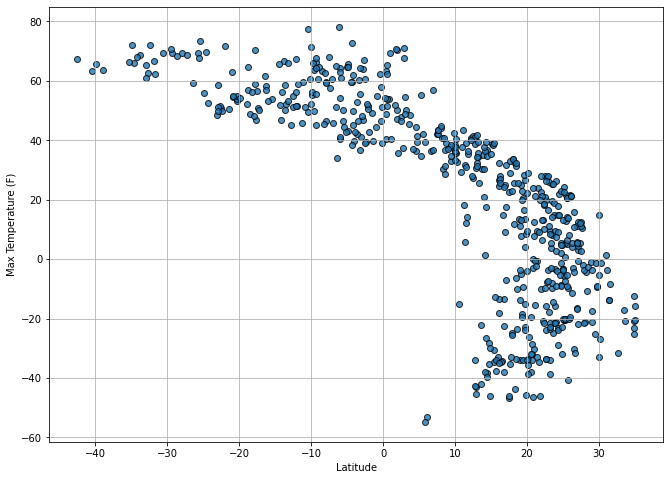

In [50]:
# Build scatter plot for latitude vs. temperature


x_values = city_data_df["temp"] 
y_values = city_data_df["lat"] 


# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [51]:
ages = city_data_df["humidity"] 
ages

0      78
1      94
2      74
3      95
4      65
       ..
572    99
573    77
574    66
575    96
576    69
Name: humidity, Length: 577, dtype: int64

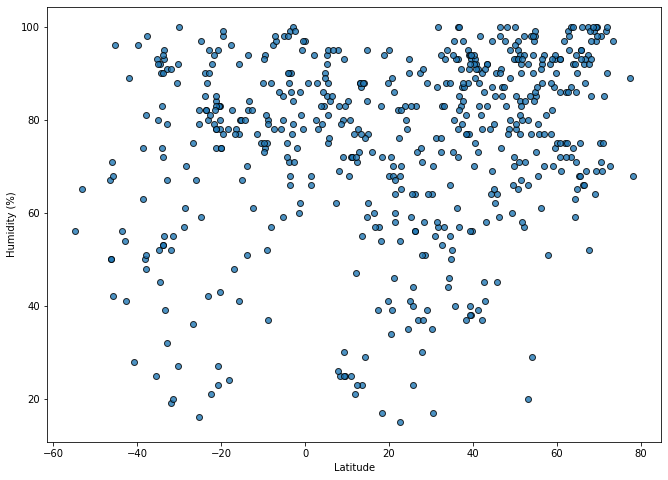

In [53]:
# Build the scatter plots for latitude vs. humidity


x_values = city_data_df["lat"]
y_values = city_data_df["humidity"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [54]:
ages = city_data_df["cloudiness"] 
ages 

0       95
1      100
2       20
3       99
4        0
      ... 
572    100
573      0
574    100
575     97
576    100
Name: cloudiness, Length: 577, dtype: int64

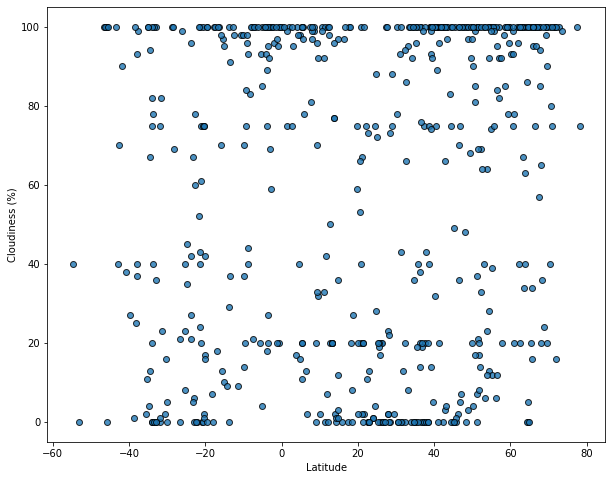

In [55]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["lat"] 
y_values = city_data_df["cloudiness"] 

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")  

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [56]:
ages = city_data_df["wind_speed"] 
ages 

0      5.53
1      0.61
2      4.12
3      1.51
4      6.17
       ... 
572    0.75
573    3.09
574    3.09
575    0.79
576    2.10
Name: wind_speed, Length: 577, dtype: float64

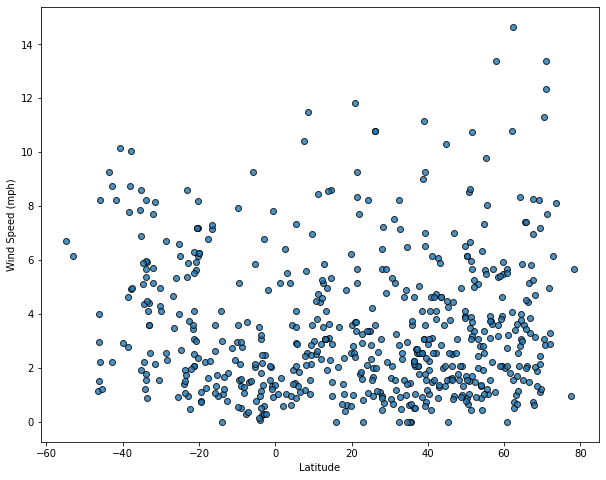

In [59]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["lat"]
y_values = city_data_df["wind_speed"]
# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [96]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
 

In [97]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_weather_df = city_data_df.loc[city_data_df["lat"] >= 0]

# Display sample data
northern_hemi_weather_df

,lon,temp,temp_max,humidity,wind_speed,lat,date,country,cloudiness
0,172.7902,27.04,27.04,78,5.53,3.0707,1670466730,KI,95
1,112.9333,24.77,24.77,94,0.61,2.0167,1670466730,MY,100
3,121.5167,-17.39,-17.39,95,1.51,50.7833,1670466731,CN,99
5,-79.2353,5.55,6.12,78,2.57,42.0970,1670466728,US,100
6,140.3000,13.83,13.83,52,0.62,35.1333,1670466732,JP,0
...,...,...,...,...,...,...,...,...,...
571,-8.5306,1.65,1.65,93,5.66,51.7075,1670466986,IE,20
573,-80.6094,-23.01,-23.01,77,3.09,51.2585,1670466986,CA,0
574,-105.7677,-16.03,-16.03,66,3.09,53.2001,1670466886,CA,100
575,88.6667,-22.99,-22.99,96,0.79,50.0000,1670466987,RU,97


In [98]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_weather_df = city_data_df.loc[city_data_df["lat"] < 0]

# Display sample data
southern_hemi_weather_df

,lon,temp,temp_max,humidity,wind_speed,lat,date,country,cloudiness
2,-159.7750,28.03,28.03,74,4.12,-21.2078,1670466731,CK,20
4,-70.9167,6.06,6.06,65,6.17,-53.1500,1670466530,CL,0
7,117.1333,34.86,34.86,23,5.65,-20.7833,1670466732,AU,0
8,-68.3000,5.81,5.81,56,6.69,-54.8000,1670466520,AR,40
9,168.3333,17.54,17.54,67,1.16,-46.6000,1670466733,NZ,100
...,...,...,...,...,...,...,...,...,...
548,144.9667,20.14,20.14,25,7.85,-35.5333,1670466972,AU,2
553,-73.9167,15.54,15.54,82,0.77,-12.6500,1670466974,PE,100
557,173.1667,17.58,17.58,80,6.91,-35.1667,1670466975,NZ,100
568,-73.2472,25.02,25.02,88,0.51,-3.7481,1670466985,PE,75


###  Temperature vs. Latitude Linear Regression Plot

In [110]:
ages = northern_hemi_weather_df ["temp_max"] 
ages 

0      27.04
1      24.77
3     -17.39
5       6.12
6      13.83
       ...  
571     1.65
573   -23.01
574   -16.03
575   -22.99
576    25.81
Name: temp_max, Length: 404, dtype: float64

In [119]:
ages = northern_hemi_weather_df ["lat"] 
ages

0       3.0707
1       2.0167
3      50.7833
5      42.0970
6      35.1333
        ...   
571    51.7075
573    51.2585
574    53.2001
575    50.0000
576     7.9986
Name: lat, Length: 404, dtype: float64

The r-squared is: 0.7384438636402625


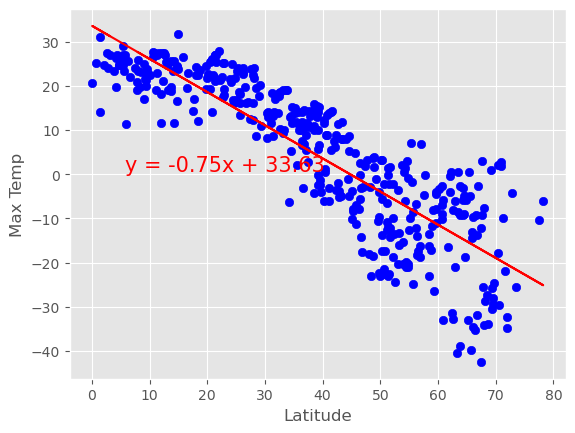

In [145]:
x_values = northern_hemi_weather_df['lat']
y_values = northern_hemi_weather_df['temp_max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [123]:
ages = southern_hemi_weather_df ["lat"] 
ages

2     -21.2078
4     -53.1500
7     -20.7833
8     -54.8000
9     -46.6000
        ...   
548   -35.5333
553   -12.6500
557   -35.1667
568    -3.7481
572   -19.5492
Name: lat, Length: 173, dtype: float64

In [124]:
ages = southern_hemi_weather_df ["temp_max"] 
ages 

2      28.03
4       6.06
7      34.86
8       5.81
9      17.54
       ...  
548    20.14
553    15.54
557    17.58
568    25.02
572    19.33
Name: temp_max, Length: 173, dtype: float64

The r-squared is: 0.22402900974065787


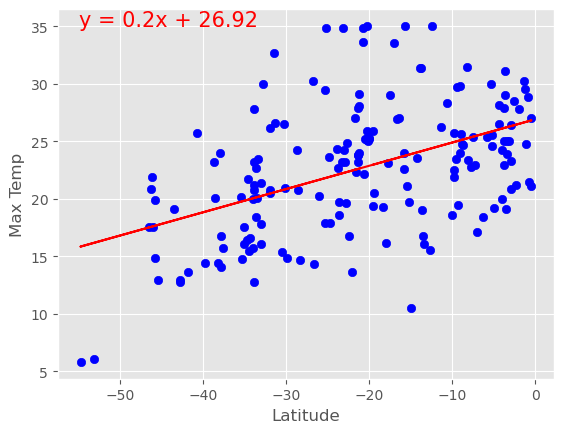

In [146]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_weather_df['lat']
y_values = southern_hemi_weather_df['temp_max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.08741724742416737


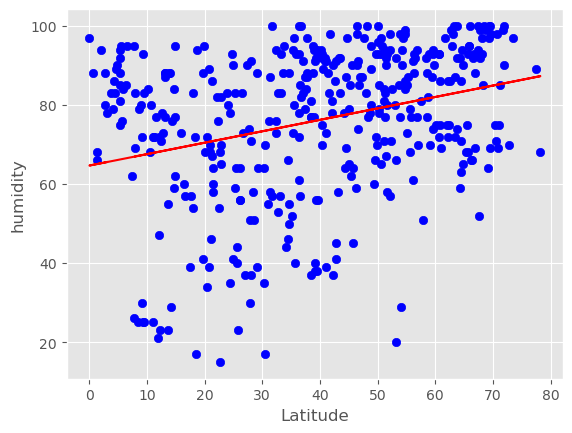

In [147]:
# Northern Hemisphere
x_values = northern_hemi_weather_df['lat']
y_values = northern_hemi_weather_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.08794292125192697


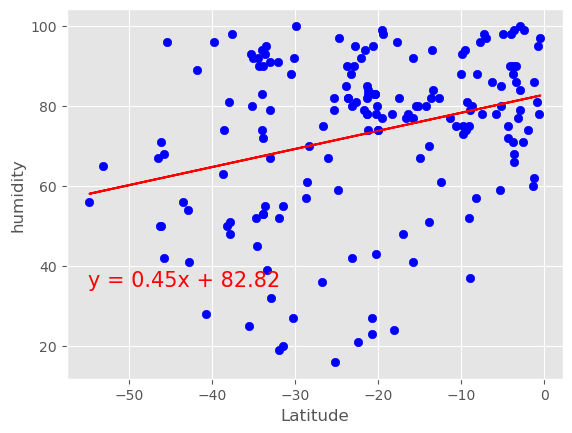

In [148]:
# Southern Hemisphere
x_values = southern_hemi_weather_df['lat']
y_values = southern_hemi_weather_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.045462703112718536


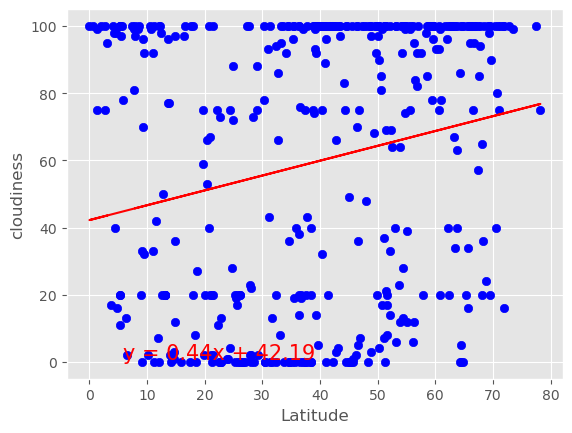

In [149]:
# Northern Hemisphere
x_values = northern_hemi_weather_df['lat']
y_values = northern_hemi_weather_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.04593377409458094


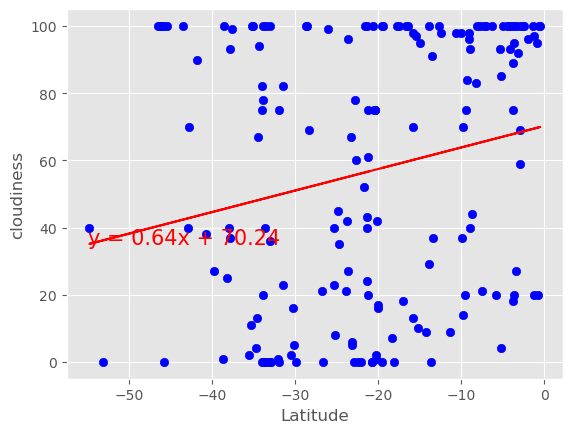

In [151]:
# Southern Hemisphere
x_values = southern_hemi_weather_df['lat']
y_values = southern_hemi_weather_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.011033962177796836


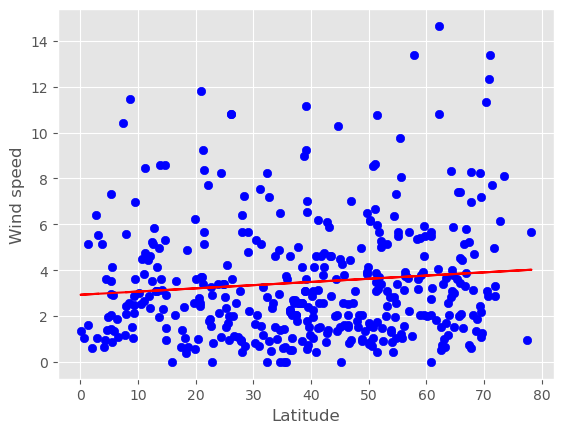

In [153]:
# Northern Hemisphere
x_values = northern_hemi_weather_df['lat']
y_values = northern_hemi_weather_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.17270995435531755


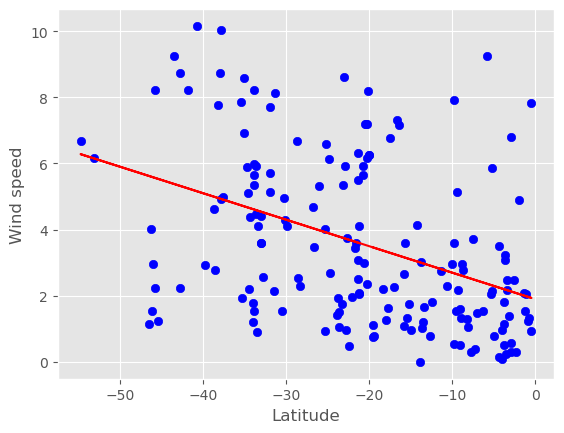

In [154]:
# Southern Hemisphere
x_values = southern_hemi_weather_df['lat']
y_values = southern_hemi_weather_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE